In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

In [70]:
auto_source = pd.read_csv(
        'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Auto.csv'
)

In [71]:
auto_source.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [72]:
auto = auto_source.drop(columns='name')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [73]:
X, y = auto.drop(columns='mpg'), auto['mpg']

In [74]:
X, y = auto[['weight']], auto['mpg']

In [75]:
y.describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [77]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr

DecisionTreeRegressor(max_depth=2)

In [78]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [79]:
print(export_text(dtr, feature_names=X.columns.to_list()))

|--- weight <= 3037.50
|   |--- weight <= 2217.50
|   |   |--- value: [32.75]
|   |--- weight >  2217.50
|   |   |--- value: [25.23]
|--- weight >  3037.50
|   |--- weight <= 3756.00
|   |   |--- value: [19.27]
|   |--- weight >  3756.00
|   |   |--- value: [14.53]



In [80]:
viz_rmodel = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='mpg')


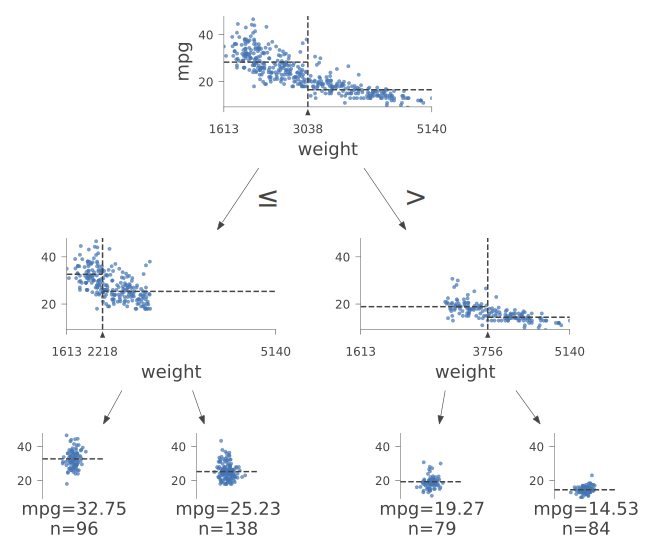

In [81]:
viz_rmodel.view(fontname='sans-serif', scale=2)

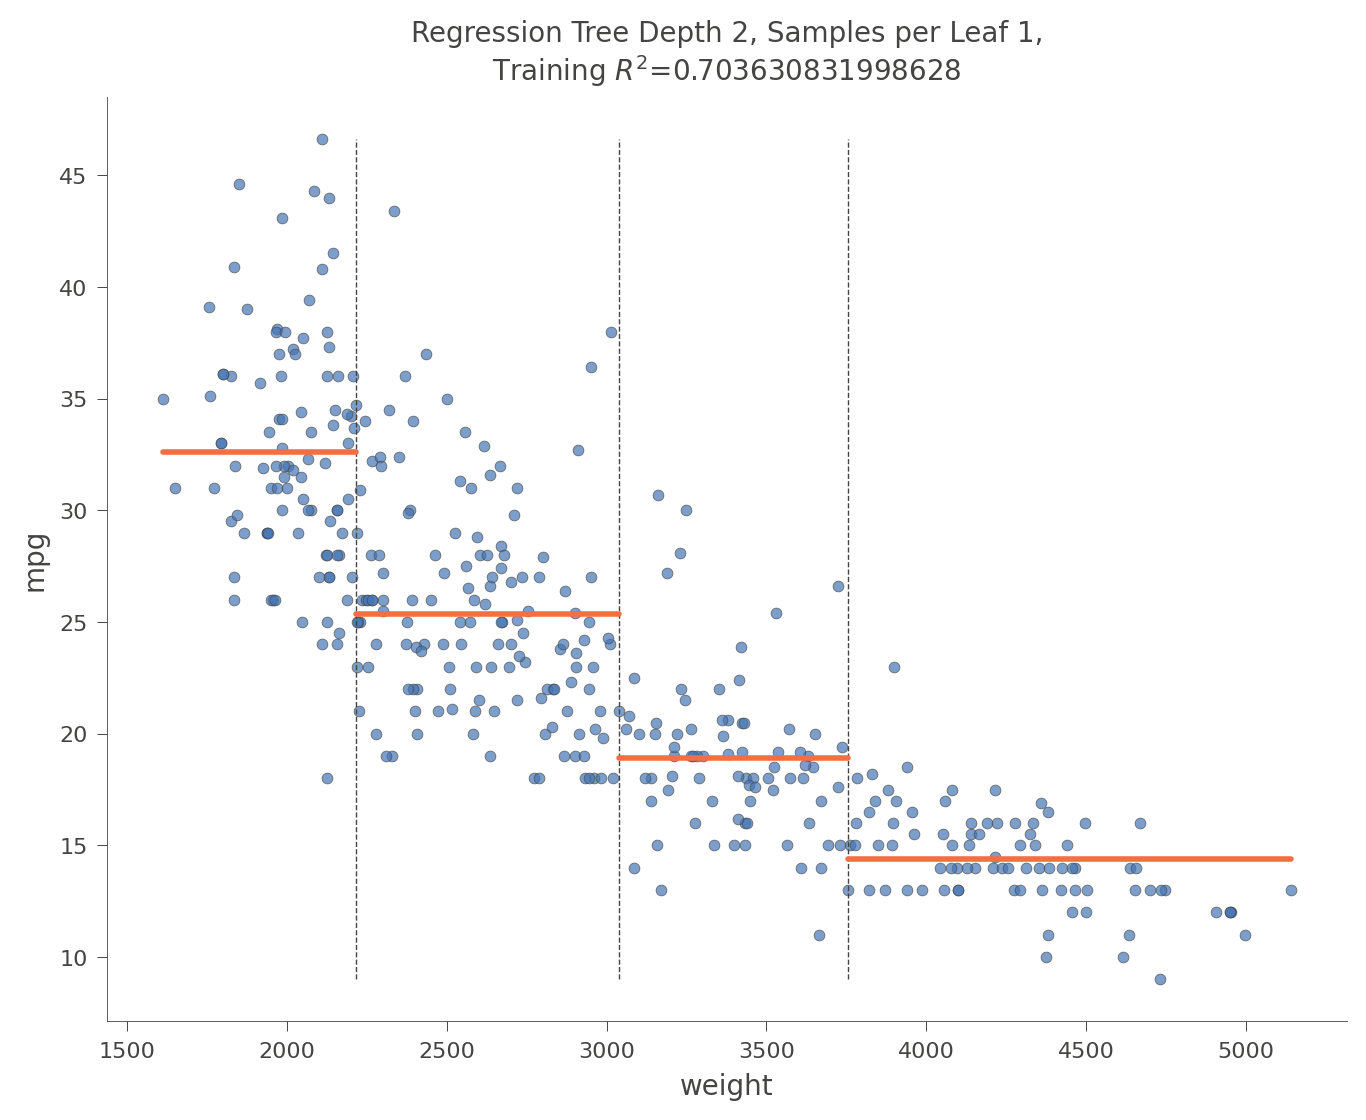

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
viz_rmodel.rtree_feature_space(features=['weight'], fontname='sans-serif', ax=ax)

In [83]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, dtr.predict(X_test))

3.0188265510215024

In [84]:
y_pred_dummy =y_train.mean()

In [85]:
np.mean(np.abs(y_test - y_pred_dummy))

6.526

In [86]:
#When the max depth increases by 1

In [92]:
X, y = auto.drop(columns='mpg'), auto['mpg']


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [89]:
dtr3 = DecisionTreeRegressor(max_depth=3)

In [97]:
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
392,4,140.0,86,2790,15.6,82,1
393,4,97.0,52,2130,24.6,82,2
394,4,135.0,84,2295,11.6,82,1
395,4,120.0,79,2625,18.6,82,1


In [93]:
dtr3.fit(X_train, y_train)

ValueError: ignored